In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('shots_data.csv')

In [3]:
df

,team,x,y,fgmade
0,Team A,-5.0,26.4,0
1,Team A,-0.8,1.2,1
2,Team A,-13.9,9.5,1
3,Team A,-5.4,26.2,0
4,Team A,-4.9,14.5,1
...,...,...,...,...
499,Team B,-0.5,2.2,0
500,Team B,3.5,7.6,0
501,Team B,0.2,8.8,0
502,Team B,-0.6,0.7,1


In [4]:
df.shape

(504, 4)

In [5]:
df['team'].unique()

array(['Team A', 'Team B'], dtype=object)

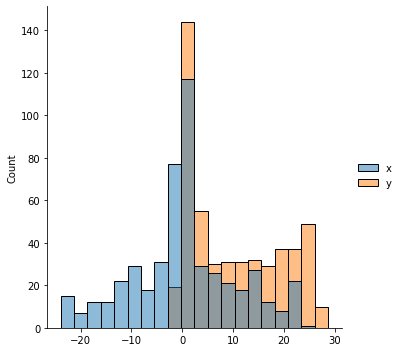

In [6]:
import seaborn as sns
sns.displot(df[['x', 'y']])

# Classifying each shot of the Dataset into Zones

In [7]:
def get_shotzone(dframe):
    zone = {}
    for shot in range(0, dframe.shape[0]):
        if ((dframe['y'][shot]**2 + dframe['x'][shot]**2)**0.5 < 23.75 and dframe['y'][shot]>7.8):
            zone[shot] = '2PT'
        if (dframe['x'][shot]<22 or dframe['x'][shot] >-22) and dframe['y'][shot]<=7.8:
            zone[shot] = '2PT'
        if (dframe['y'][shot]**2 + dframe['x'][shot]**2)**0.5 >= 23.75 and dframe['y'][shot]>7.8:
            zone[shot] = 'NC3'
        if (dframe['x'][shot]>=22 or dframe['x'][shot]<=-22) and dframe['y'][shot]<=7.8:
            zone[shot] = 'C3'
    return list(dict(sorted(zone.items())).values())

In [8]:
df['Zone'] = get_shotzone(df)

In [9]:
df

,team,x,y,fgmade,Zone
0,Team A,-5.0,26.4,0,NC3
1,Team A,-0.8,1.2,1,2PT
2,Team A,-13.9,9.5,1,2PT
3,Team A,-5.4,26.2,0,NC3
4,Team A,-4.9,14.5,1,2PT
...,...,...,...,...,...
499,Team B,-0.5,2.2,0,2PT
500,Team B,3.5,7.6,0,2PT
501,Team B,0.2,8.8,0,2PT
502,Team B,-0.6,0.7,1,2PT


In [10]:
df['Zone'].value_counts()

2PT    344
NC3    130
C3      30
Name: Zone, dtype: int64

# Calculation of Metrics

### Shots Attepmted by Team, Zone and FGmade 

In [11]:
zone_count_fgmade = df.groupby(['team','Zone','fgmade']).count()['x']

In [12]:
zone_count_fgmade

team    Zone  fgmade
Team A  2PT   0         99
              1         95
        C3    0          9
              1          9
        NC3   0         47
              1         21
Team B  2PT   0         83
              1         67
        C3    0          8
              1          4
        NC3   0         41
              1         21
Name: x, dtype: int64

In [13]:
zone_count_fgmade['Team A']

Zone  fgmade
2PT   0         99
      1         95
C3    0          9
      1          9
NC3   0         47
      1         21
Name: x, dtype: int64

### Attempts by Team and Zone

In [14]:
zone_count_attempts = df.groupby(['team','Zone']).count()['x']

In [15]:
zone_count_attempts

team    Zone
Team A  2PT     194
        C3       18
        NC3      68
Team B  2PT     150
        C3       12
        NC3      62
Name: x, dtype: int64

In [16]:
zone_count_attempts['Team A']['2PT']

194

### FGmade count by team

In [17]:
fgmade_count = df.groupby(['team', 'fgmade']).count()['Zone']

In [18]:
fgmade_count

team    fgmade
Team A  0         155
        1         125
Team B  0         132
        1          92
Name: Zone, dtype: int64

### Attempts by Team

In [19]:
attempt_count = df.groupby(['team']).count()['Zone']

In [20]:
attempt_count

team
Team A    280
Team B    224
Name: Zone, dtype: int64

## Reusable functions to automate the task 

In [21]:
def get_zone_distribution(dframe):
    zone_count_attempts = dframe.groupby(['team','Zone']).count()['x']
    attempt_count = dframe.groupby(['team']).count()['Zone']
    
    a = {}
    b = {}
    a['2PT'] = zone_count_attempts['Team A']['2PT']/attempt_count['Team A']
    a['C3'] = zone_count_attempts['Team A']['C3']/attempt_count['Team A']
    a['NC3'] = zone_count_attempts['Team A']['NC3']/attempt_count['Team A']
    b['2PT'] = zone_count_attempts['Team B']['2PT']/attempt_count['Team B']
    b['C3'] = zone_count_attempts['Team B']['C3']/attempt_count['Team B']
    b['NC3'] = zone_count_attempts['Team B']['NC3']/attempt_count['Team B']
    
    return pd.DataFrame([a, b],index=['Team A', 'Team B'])

In [22]:
get_zone_distribution(df)

,2PT,C3,NC3
Team A,0.692857,0.064286,0.242857
Team B,0.669643,0.053571,0.276786


In [23]:
def get_eFG_byZone(dframe):
    
    #Distribution of attempts and FG by Zone and Team
    zone_count_fgmade = dframe.groupby(['team','Zone','fgmade']).count()['x'] 
    
    #Attempts by Zone
    zone_count_attempts = df.groupby(['team','Zone']).count()['x']
    
    #Distribution of FG and attempts by Team
    fgmade_count = dframe.groupby(['team', 'fgmade']).count()['Zone']
    
    
    #FG made in C3 zone
    FGM_C3_Team_A = zone_count_fgmade['Team A']['C3'][1]
    FGM_C3_Team_B = zone_count_fgmade['Team B']['C3'][1]
    #FG Attempts in C3 Zone
    FGA_C3_Team_A = zone_count_attempts['Team A']['C3']
    FGA_C3_Team_B = zone_count_attempts['Team B']['C3']
 
    
    #FG made in NC3 zone
    FGM_NC3_Team_A = zone_count_fgmade['Team A']['NC3'][1]
    FGM_NC3_Team_B = zone_count_fgmade['Team B']['NC3'][1]
    #FG Attempts in NC3 Zone
    FGA_NC3_Team_A = zone_count_attempts['Team A']['NC3']
    FGA_NC3_Team_B = zone_count_attempts['Team B']['NC3']

    
    
    #FG made in 2P zone
    FGM_2P_Team_A = zone_count_fgmade['Team A']['2PT'][1]
    FGM_2P_Team_B = zone_count_fgmade['Team B']['2PT'][1]
    #FG Attempts in 2p Zone
    FGA_2p_Team_A = zone_count_attempts['Team A']['2PT']
    FGA_2p_Team_B = zone_count_attempts['Team B']['2PT']



    eFG_2P_Team_A = FGM_2P_Team_A / FGA_2p_Team_A
    eFG_2P_Team_B = FGM_2P_Team_B / FGA_2p_Team_B
    
    eFG_C3_Team_A = (FGM_C3_Team_A + (0.5 * FGM_C3_Team_A))/FGA_C3_Team_A
    eFG_C3_Team_B = (FGM_C3_Team_B + (0.5 * FGM_C3_Team_B))/FGA_C3_Team_B
    
    eFG_NC3_Team_A = (FGM_NC3_Team_A + (0.5 * FGM_NC3_Team_A))/FGA_NC3_Team_A
    eFG_NC3_Team_B = (FGM_NC3_Team_B + (0.5 * FGM_NC3_Team_B))/FGA_NC3_Team_B
    
    Team_A = [eFG_2P_Team_A, eFG_NC3_Team_A, eFG_C3_Team_A]
    Team_B = [eFG_2P_Team_B, eFG_NC3_Team_B, eFG_C3_Team_B]
    
    return pd.DataFrame([Team_A, Team_B], index=['Team A', 'Team B'], columns=['2PT', 'NC3', 'C3'])


In [24]:
get_eFG_byZone(df)

,2PT,NC3,C3
Team A,0.489691,0.463235,0.75
Team B,0.446667,0.508065,0.50
